# 1. INTRODUCTION 

NYT Bestseller List is the list of best-selling books in the United States, sorted by format and genre. For any author, making the NYT Bestseller list is a reflector of success and encouragement for readers to buy their book. If a new author hits the New York Times Best Seller list, their chances of making writing as their career will be much higher, especially if it remains on the list for several weeks, as the NY Times Best Seller list correlates strongly with book sales. Hence, my goal is to find out how long the book is going to stay on the list depending on different features. 


### OBJECTIVE:

There are two primary goals of this project:

1. Do a exploratory analysis of the NYT Best Seller List.
2. Prediction: To predict the no_of_weeks the book is going to stay on the NYT Bestsellers list.

### DATASET :

The dataset is gathered from the New York Times Books API for 'Combined Print and E-book' Fiction best sellers from December 19, 2021 to December 18, 2022.

The API can be found here: https://developer.nytimes.com/

Collected data includes the book title, author, the publisher, the isbn, the contributor, the date of the best seller list, the rank (this week and last week), number of weeks on the list, and the price.

# 2. IMPORTING LIBRARIES

Python is the scripting language I will be using for this project as it provides amazing libraries. I am going to introduce few necessary libraries for now, and unbox new libraries according to neccessity.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

# 3. Read and Examine Data

In [2]:
df = pd.read_csv('books/books.csv')
df.head()

,title,author,price,publisher,isbn,contributor,date,rank,rank_last_week,weeks_on_list
0,A WORLD OF CURIOSITIES,Louise Penny,0.0,Minotaur,1250145317,by Louise Penny,2022-12-18,1,0,1
1,IT STARTS WITH US,Colleen Hoover,0.0,Atria,1668001225,by Colleen Hoover,2022-12-18,2,1,7
2,IT ENDS WITH US,Colleen Hoover,0.0,Atria,1501110365,by Colleen Hoover,2022-12-18,3,3,77
3,VERITY,Colleen Hoover,0.0,Grand Central,1538724731,by Colleen Hoover,2022-12-18,4,4,52
4,THE BOYS FROM BILOXI,John Grisham,0.0,Doubleday,0385548923,by John Grisham,2022-12-18,5,6,7


In [3]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
df.info()

The shape of the  data is (row, column):(5475, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5475 non-null   object 
 1   author          5475 non-null   object 
 2   price           5475 non-null   float64
 3   publisher       5475 non-null   object 
 4   isbn            5475 non-null   object 
 5   contributor     5475 non-null   object 
 6   date            5475 non-null   object 
 7   rank            5475 non-null   int64  
 8   rank_last_week  5475 non-null   int64  
 9   weeks_on_list   5475 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 427.9+ KB


1. We have collected 5475 books from the list and there are mixed datatypes in each column. 
2. We have 3 integer,1 float and 6 object datatypes in our dataset.

# 4. Data Cleaning

Right away, it looks like we can clean up the columns. Date will be renamed to list_date, to clarify that it refers to the published date of the bestseller list. Since we don't want to meddle with the pandas rank function, rank will be changed to ranking.

In [3]:
df.rename(columns={'date':'list_date','rank':'ranking'}, inplace=True)
df.head()

,title,author,price,publisher,isbn,contributor,list_date,ranking,rank_last_week,weeks_on_list
0,A WORLD OF CURIOSITIES,Louise Penny,0.0,Minotaur,1250145317,by Louise Penny,2022-12-18,1,0,1
1,IT STARTS WITH US,Colleen Hoover,0.0,Atria,1668001225,by Colleen Hoover,2022-12-18,2,1,7
2,IT ENDS WITH US,Colleen Hoover,0.0,Atria,1501110365,by Colleen Hoover,2022-12-18,3,3,77
3,VERITY,Colleen Hoover,0.0,Grand Central,1538724731,by Colleen Hoover,2022-12-18,4,4,52
4,THE BOYS FROM BILOXI,John Grisham,0.0,Doubleday,0385548923,by John Grisham,2022-12-18,5,6,7


Next, we will convert the list_date field to a date format.

In [4]:
df.list_date = pd.to_datetime(df.list_date)
df.dtypes

title                     object
author                    object
price                    float64
publisher                 object
isbn                      object
contributor               object
list_date         datetime64[ns]
ranking                    int64
rank_last_week             int64
weeks_on_list              int64
dtype: object

We'll add a list_month column for more in-depth analysis and plotting.

In [5]:
df['list_month'] = df.list_date.dt.month
df.head()

,title,author,price,publisher,isbn,contributor,list_date,ranking,rank_last_week,weeks_on_list,list_month
0,A WORLD OF CURIOSITIES,Louise Penny,0.0,Minotaur,1250145317,by Louise Penny,2022-12-18,1,0,1,12
1,IT STARTS WITH US,Colleen Hoover,0.0,Atria,1668001225,by Colleen Hoover,2022-12-18,2,1,7,12
2,IT ENDS WITH US,Colleen Hoover,0.0,Atria,1501110365,by Colleen Hoover,2022-12-18,3,3,77,12
3,VERITY,Colleen Hoover,0.0,Grand Central,1538724731,by Colleen Hoover,2022-12-18,4,4,52,12
4,THE BOYS FROM BILOXI,John Grisham,0.0,Doubleday,0385548923,by John Grisham,2022-12-18,5,6,7,12


In this step, we will remove the column that wont add value in our analysis

1. ISBN is an outdated numbering system (it was superceded by ISBN13), so that column can be removed.
2. Contributor appears to be the same as the author's name, so we will also remove that column.
3. Lastly, price and list_date column can be removed as well.

In [6]:
df.drop(['price','isbn','contributor','list_date'], axis = 1, inplace = True)
df.head()

,title,author,publisher,ranking,rank_last_week,weeks_on_list,list_month
0,A WORLD OF CURIOSITIES,Louise Penny,Minotaur,1,0,1,12
1,IT STARTS WITH US,Colleen Hoover,Atria,2,1,7,12
2,IT ENDS WITH US,Colleen Hoover,Atria,3,3,77,12
3,VERITY,Colleen Hoover,Grand Central,4,4,52,12
4,THE BOYS FROM BILOXI,John Grisham,Doubleday,5,6,7,12


### 4.1  Handle Missing Values

Datasets in the real world are often messy, so, we will check for any null values in our dataset.

In [8]:
df.isnull().sum()

title             0
author            0
publisher         0
ranking           0
rank_last_week    0
weeks_on_list     0
list_month        0
dtype: int64

Since, there is no need to handle any missing values we can move forward to the next process.

### 4.2 Handle Outliers

Outliers are any unusual values in an dataset, and they can distort statistical analyses and violate their assumptions. While excluding outliers can cause your results to become statistically significant, it must be done only when we are sure that the outlier is either a measurement/data entry error because they can be an excellent signals of the new trends. Outliers can be very informative about the subject-area and data collection process. It is essential to understand how outliers occur in a particular use case. So, let's first check for any outliers by visualizing our data and decide on what to do with them.

C:\Users\ruchi\AppData\Local\Temp\ipykernel_7648\354453209.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'List Month')

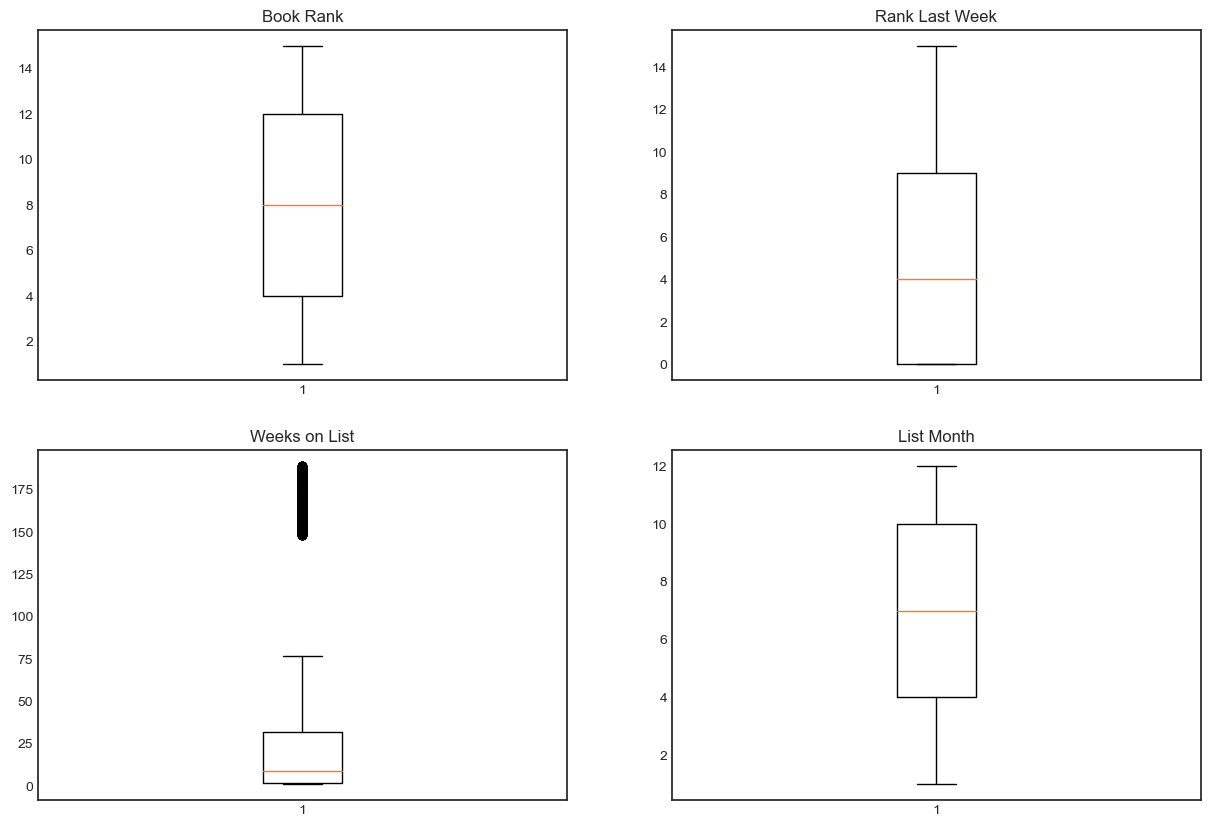

In [9]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['ranking'])
ax.set_title('Book Rank')
ax=plt.subplot(222)
plt.boxplot(df['rank_last_week'])
ax.set_title('Rank Last Week')
ax=plt.subplot(223)
plt.boxplot(df['weeks_on_list'])
ax.set_title('Weeks on List')
ax=plt.subplot(224)
plt.boxplot(df['list_month'])
ax.set_title('List Month')

In our case, the target variable 'weeks_on_list' contains outliers. However, the number of weeks a book can stay on the is not definitve. In NYT bestseller history, the longest a book has stayed on the list is 598. This can happen due to many different factors like the author who wrote it, the month it was published on, or the quality of the book itself, which is why we will be ignoring the outliers, for now. We will try to explore any patterns that can be found because of these outliers in our Exploratory Data Analysis below. 

# 5. Exploratory Data Analysis

In [10]:
import dtale
import klib
import warnings
warnings.filterwarnings('ignore')

In [13]:
dtale.show(df)

#### 5.1 Top 10 Longest Best Selling Book 

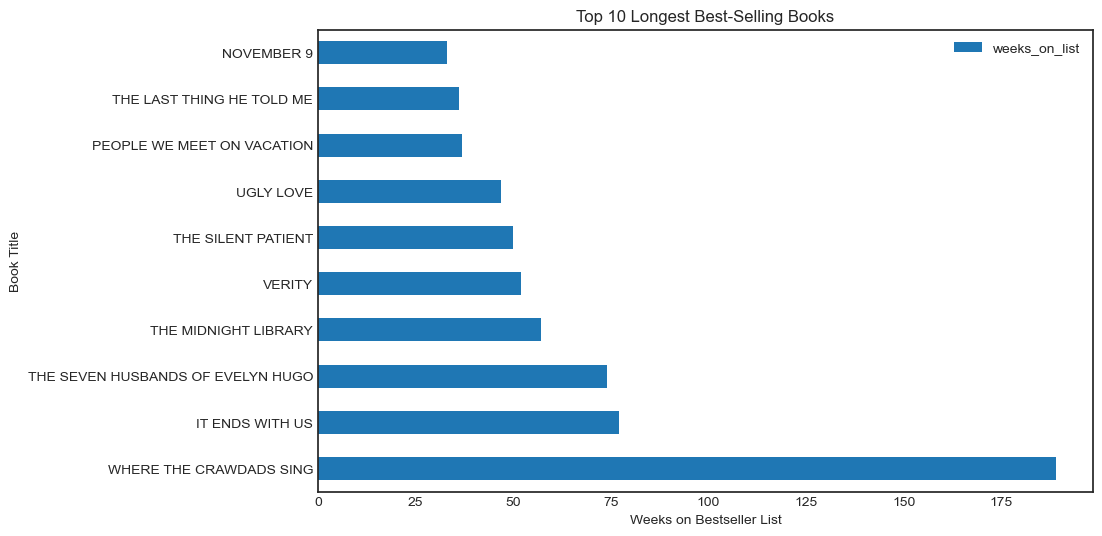

In [30]:
longest_bestselling_titles = df[['title', 'weeks_on_list']]\
                             .groupby('title')\
                             .max()\
                             .sort_values('weeks_on_list', ascending = False)\
                             .head(10)

longest_bestselling_titles.plot(kind='barh', figsize=(10,6))
plt.xlabel('Weeks on Bestseller List')
plt.ylabel('Book Title')
plt.title('Top 10 Longest Best-Selling Books');

#### 5.2 Titles Most Often Ranked No. 1

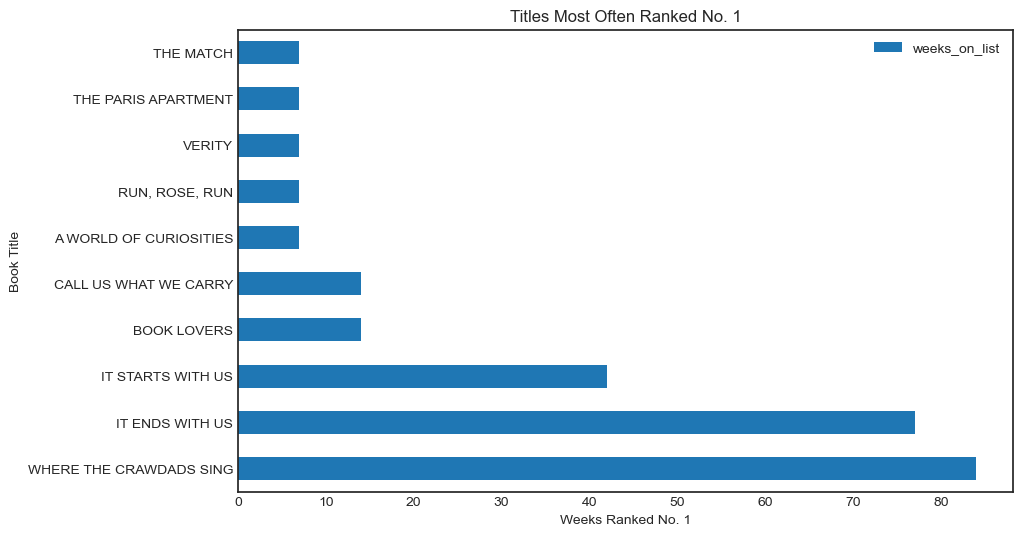

In [29]:
title_ranked_number_one = df[df.ranking == 1]
longest_number_one_titles = title_ranked_number_one[['title', 'weeks_on_list']].groupby('title').count().sort_values('weeks_on_list', ascending = False).head(10)

longest_number_one_titles.plot(kind='barh', figsize=(10,6))
plt.xlabel('Weeks Ranked No. 1')
plt.ylabel('Book Title')
plt.title('Titles Most Often Ranked No. 1');

#### 5.3 Longest Best-Selling Authors on the list

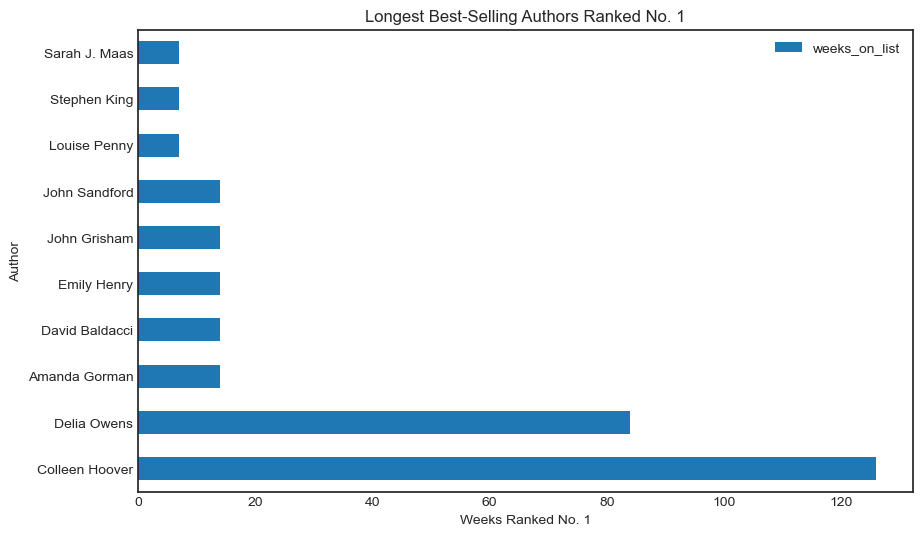

In [34]:
longest_bestselling_authors = title_ranked_number_one[['author', 'weeks_on_list']]\
                              .groupby('author')\
                              .count().sort_values('weeks_on_list', ascending = False)\
                              .head(10)

longest_bestselling_authors.plot(kind='barh', figsize=(10,6))
plt.xlabel('Weeks Ranked No. 1')
plt.ylabel('Author')
plt.title('Longest Best-Selling Authors Ranked No. 1');

#### 5.4 Numeric Data Distribution

<AxesSubplot: xlabel='list_month', ylabel='Density'>

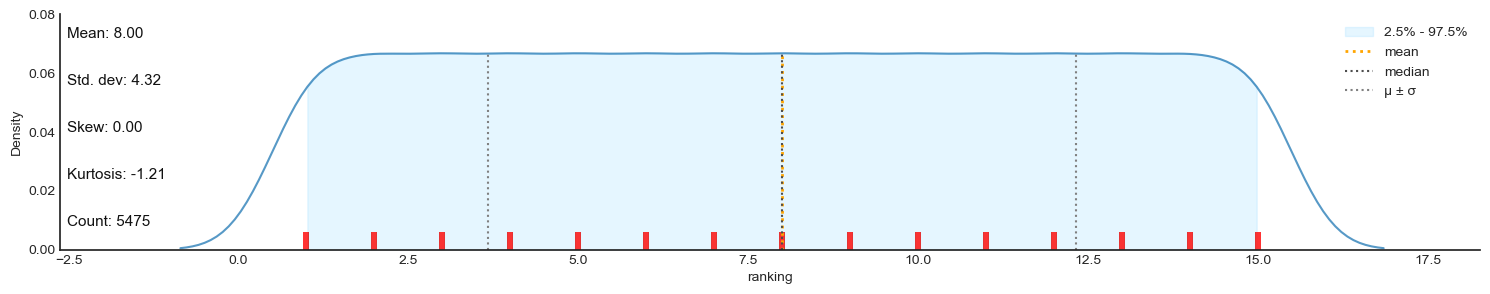

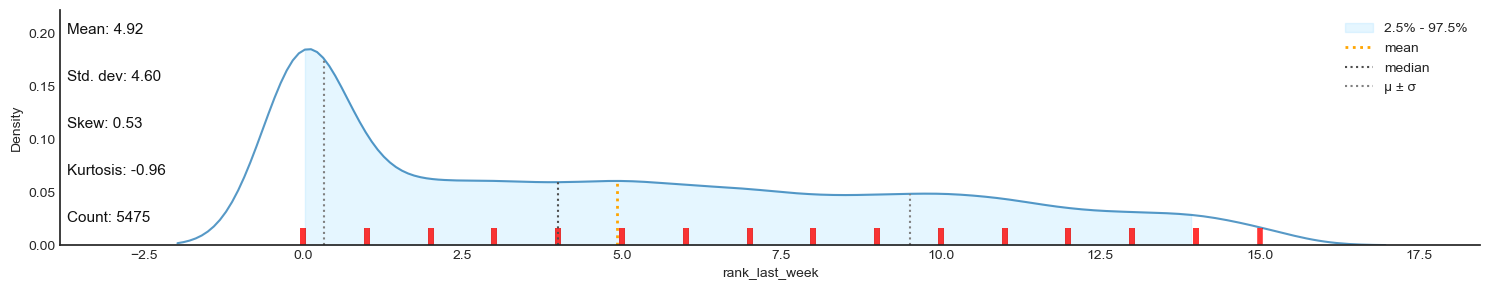

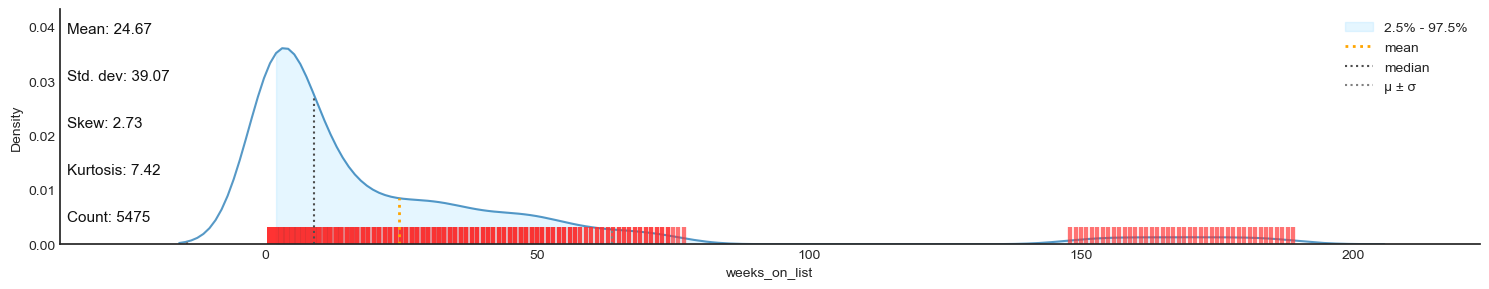

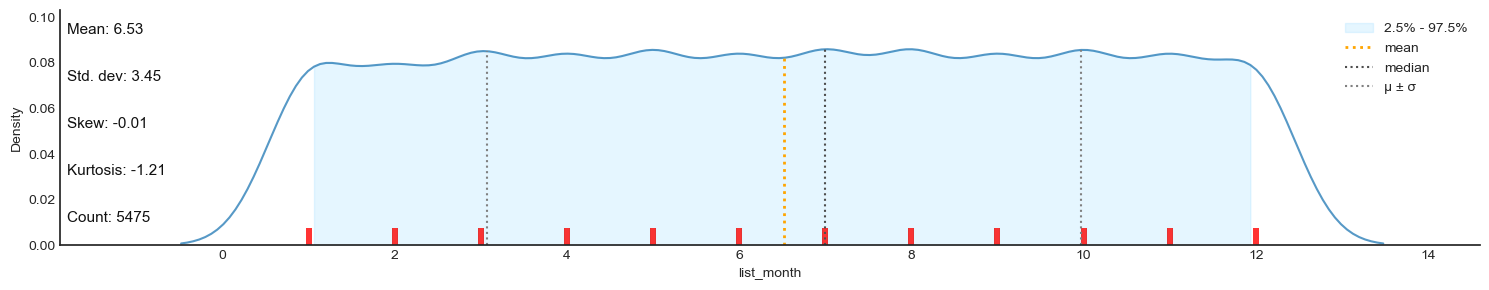

In [12]:
klib.dist_plot(df)

#### 5.5 Corelation

<AxesSubplot: >

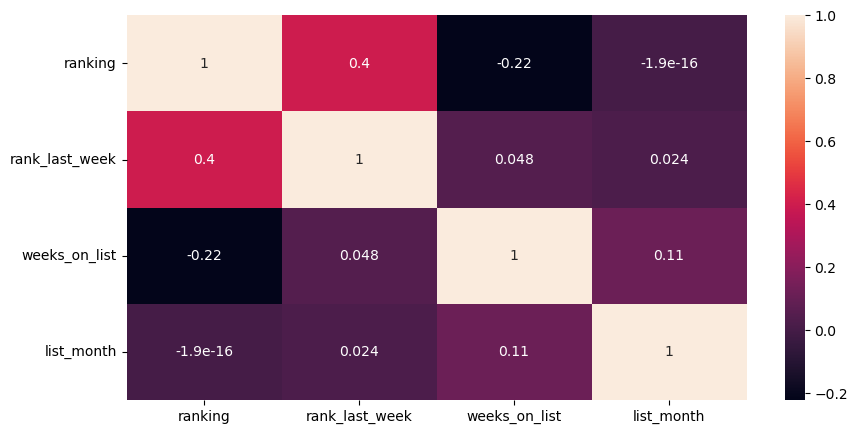

In [58]:
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(), annot = True)

# 6. Data Preprocessing

Before jumping onto creating models we have to prepare our dataset for the models. We dont have to perform imputation as we dont have any missing values but we have text variables which needs to be embedded.

### 6.1 Stemming:

Stemming is the process of reducing a word to its Keyword. Before embedding our text data, we will perform stemming to reduce the text down to its root. We will be doing this using the Porter Stemmer function.

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
#download Stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruchi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#print the stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
port_stem = PorterStemmer()

In [10]:
def stemming(book_features):
    stemmed_features = re.sub('[^a-zA-Z]',' ', book_features) #exclude every character expect words
    stemmed_features = stemmed_features.lower()         #convert to lower case
    stemmed_features = stemmed_features.split()
    stemmed_features = [port_stem.stem(word) for word in stemmed_features if not word in stopwords.words('english')] #remove stop words
    stemmed_features = ' '.join(stemmed_features)
    return stemmed_features    

In [11]:
df['title']= df['title'].apply(stemming)
df['author']= df['author'].apply(stemming)
df['publisher']= df['publisher'].apply(stemming)

In [13]:
df.head()

,title,author,publisher,ranking,rank_last_week,weeks_on_list,list_month
0,world curios,louis penni,minotaur,1,0,1,12
1,start us,colleen hoover,atria,2,1,7,12
2,end us,colleen hoover,atria,3,3,77,12
3,veriti,colleen hoover,grand central,4,4,52,12
4,boy biloxi,john grisham,doubleday,5,6,7,12


### 6.2 Term Frequency — Inverse Dense Frequency(TF IDF)

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be described as the assessment of a word's significance to a text within a corpus or series. In our case, it will assign a value to the words in our text features that represents how important each word is in our dataset. Then, texts with similar, relevant words will have similar vectors.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [19]:
#vector of 'title'
title = vectorizer.fit_transform(df['title']).toarray()

print(title.shape)

(5475, 307)


In [20]:
#vector of 'author'
author = vectorizer.fit_transform(df['author']).toarray()

print(author.shape)

(5475, 254)


In [21]:
#vector of 'publiser'
publisher = vectorizer.fit_transform(df['publisher']).toarray()

print(publisher.shape)

(5475, 64)


In [17]:
#convert numeric features into two-dimensional array.
ranking = np.reshape(np.array(df['ranking']),  (5475, -1))
print(ranking.shape)
rank_last_week = np.reshape(np.array(df['rank_last_week']),  (5475, -1))
list_month = np.reshape(np.array(df['list_month']),  (5475, -1))

(5475, 1)


# 7. Assign Target and Feature Variables

Our target variable is 'weeks_on_list' as our goal is to predict the numbers of weeks a book will stay on the bestseler list. We will use rest of the features as our independent variables.

### 7.1 Features Variable

In [56]:
# X is our independen features variable
X = np.concatenate((title, author, publisher, ranking, rank_last_week, list_month), axis=1)
X

array([[ 0.,  0.,  0., ...,  1.,  0., 12.],
       [ 0.,  0.,  0., ...,  2.,  1., 12.],
       [ 0.,  0.,  0., ...,  3.,  3., 12.],
       ...,
       [ 0.,  0.,  0., ..., 13.,  9., 12.],
       [ 0.,  0.,  0., ..., 14.,  2., 12.],
       [ 0.,  0.,  0., ..., 15.,  0., 12.]])

### 7.2 Target Variable 

In [23]:
#Y is our dependent target variable
Y = np.array(df['weeks_on_list'])
Y

array([ 1,  7, 77, ...,  3,  2,  8], dtype=int64)

### 7.3 Split Train and Testing Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#train and test split data
#Split ratio =80:20. The 30% testing dataset is represented by 0.2.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [26]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of testing label:', Y_test.shape)

Shape of training feature: (4380, 628)
Shape of testing feature: (1095, 628)
Shape of training label: (4380,)
Shape of testing label: (1095,)


# 8.  Standarize Data

Since the characteristics of our dataset differ greatly between their ranges, we will be using Standard Scaler to scale each feature variables to unit variance.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
#learn how data is distributed in X_train
X_train_sc = sc.fit_transform(X_train)
X_train_sc

array([[-0.04783649, -0.05456072, -0.0302337 , ...,  0.69244284,
        -1.06600168, -1.60901971],
       [-0.04783649, -0.05456072, -0.0302337 , ..., -0.46259549,
         0.45970141, -0.1572427 ],
       [-0.04783649, -0.05456072, -0.0302337 , ...,  0.23042751,
         0.45970141,  0.71382351],
       ...,
       [-0.04783649, -0.05456072, -0.0302337 , ...,  0.92345051,
        -1.06600168,  0.71382351],
       [-0.04783649, -0.05456072, -0.0302337 , ..., -1.15561848,
        -0.8480441 ,  0.71382351],
       [-0.04783649, -0.05456072, -0.0302337 , ...,  0.46143517,
         0.67765899, -1.60901971]])

In [30]:
#transform the data
X_test_sc = sc.transform(X_test)
X_test_sc

array([[-0.04783649, -0.05456072, -0.0302337 , ..., -1.38662615,
        -1.06600168,  1.29453432],
       [-0.04783649, -0.05456072, -0.0302337 , ...,  0.23042751,
         1.76744691, -1.31866431],
       [-0.04783649, -0.05456072, -0.0302337 , ...,  1.38546584,
         1.11357416,  1.00417891],
       ...,
       [-0.04783649, -0.05456072, -0.0302337 , ..., -1.15561848,
        -0.63008651, -1.02830891],
       [-0.04783649, -0.05456072, -0.0302337 , ..., -0.69360315,
         0.24174382,  0.13311271],
       [-0.04783649, -0.05456072, -0.0302337 , ...,  0.92345051,
         1.54948932,  1.58488972]])

# 9. Machine Learning Models 

At this step, we will now feed our preprocessed data into our model to predict the no of weeks a book will stay on the list.

### 9.1. Descision Tree

In [31]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from dtreeviz.trees import *

In [32]:
dt = DecisionTreeRegressor()

In [33]:
dt = dt.fit(X_train,Y_train)

In [34]:
Y_train

array([  1,  47,  25, ...,   1, 175,   8], dtype=int64)

In [35]:
#predict new output values, based on the train features (X_train)
Y_pred_dt_train = dt.predict(X_train)
Y_pred_dt_train

array([  1.,  47.,  25., ...,   1., 175.,   8.])

In [36]:
#predict new output values, based on the test features (X_test)
Y_pred_dt_test = dt.predict(X_test)
Y_pred_dt_test

array([ 1., 12., 68., ..., 39., 24., 74.])

In [37]:
print(r2_score(Y_test,Y_pred_dt_test))
print(mean_absolute_error(Y_test,Y_pred_dt_test))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_dt_test)))

0.9983426903085859
0.17743585063310235
1.587508205018764


### 9.2 Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor(n_estimators=100)

In [44]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
#predict new output values, based on the train features (X_train)
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_train

array([  1.        ,  47.01894737,  25.        , ...,   1.        ,
       175.        ,   8.09      ])

In [46]:
#predict new output values, based on the test features (X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf

array([ 1.        , 11.99      , 68.02571429, ..., 39.        ,
       24.03      , 74.        ])

In [47]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.9982723160041781
0.23105462789679473
1.6208629632874298


### 9.4 Support Vector Regression

In [105]:
from sklearn.svm import SVR

In [106]:
sv = SVR(kernel = 'rbf')

In [107]:
sv.fit(X_train_sc, Y_train)

SVR()

In [108]:
Y_train

5035      1
3005     47
1328     25
5352     27
2967      2
       ... 
4171     38
599      70
1361      1
1547    175
4959      8
Name: weeks_on_list, Length: 4380, dtype: int64

In [109]:
#predict new output values, based on the train features (X_train)
Y_pred_sv_train = sv.predict(X_train_sc)
Y_pred_sv_train

array([ 5.71274179, 44.80155524, 24.05524579, ...,  0.89967469,
       85.66087162, 13.57722803])

In [110]:
#predict new output values, based on the test features (X_test)
Y_pred_sv = sv.predict(X_test_sc)
Y_pred_sv

array([ 3.45828127, 14.49800608, 47.04208542, ..., 38.10417587,
       26.14114232, 48.18405327])

In [111]:
print(r2_score(Y_test,Y_pred_sv))
print(mean_absolute_error(Y_test,Y_pred_sv))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_sv)))

0.7059735666813508
9.40935511535647
21.14498257046524


# 10. Summary

From the analysis report on NYT Bestseller dataset here are my conclusions:

1. Authors who have stayed on the list for a long time have high chances of writing another bestseller.
2. Ranking of the book itself does not correlate with how long a book will stay on the list.